In [2]:
import numpy as np

In [3]:
# checking the alternative sigmoid derivative
def f_sig(a):
    return a/(1+abs(a))

def df_sig(a):
    return 1/(1+abs(a))**2

h = 0.00000001
x = np.random.random((1,1))
(f_sig(x+h) - f_sig(x)) / h, df_sig(x)

(array([[ 0.37829184]]), array([[ 0.37829185]]))

In [ ]:
# the approach is using vectors/matrices, 
# thus all inputs are applied at once
X = np.random.random((2,3))
def initialise_weights(num_neurons):
    # the weights are between -1 and 1, with mean 0
    w_b0_i = 2*np.random.random((num_neurons, 1)) - 1
    w0_i = 2*np.random.random((num_neurons, 1)) - 1

    w_b1_i = 2*np.random.random((1, 1)) - 1
    w1_i = 2*np.random.random((num_neurons, 1)) - 1 
    return w_b0_i, w0_i, w_b1_i, w1_i 

def feed_forward(w_b0, w0, w_b1, w1):
    # z0 is the output of the hidden layer
    a0 = np.dot(w0, X) + w_b0
    z0 = f_sig(a0)

    # z1 is the final output (predictions/y_hat)   
    a1 = np.dot(z0.T, w1) + w_b1
    z1 = a1
    return (a0, z0, a1, z1)


w_b0, w0, w_b1, w1 = initialise_weights(4)
a0, z0, a1, z1 = feed_forward(w_b0, w0, w_b1, w1)

mse(z1, y)

In [ ]:
def back_prop(z0, a1, z1):
    d_output = z1 - y
    dw1 = np.dot(dZ2, A1.T)
    np.sum(dZ2, axis=1)
    
    deriv_layer = np.multiply(np.dot(W2.T, dZ2), d_alternative_sigmoid(Z1))
    np.dot(dZ1, X.T)
    np.sum(dZ1, axis=1)

In [440]:
d = 1
K = 1
M = 4
e
# invariant : j<i
Wij = np.zeros((d+M+K+1,d+M+K+1))
Wij.shape,Xtr.shape

((7, 7), (2, 25))

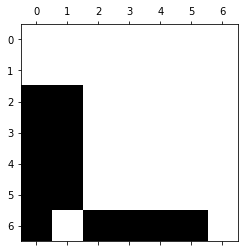

In [441]:
# random init biases for both hidden layer and output
Wij[d+1:d+1+M+K,0:1] = 2*np.random.random((M+K,1))-1
# random init weights for the hidden layer
Wij[d+1:d+M+1,1:d+1] = 2*np.random.random((M,d))-1
# random init weights for the output layer
Wij[d+M+K:d+M+K+1,d+1:d+1+M] = 2*np.random.random((K,M))-1
plt.spy(Wij)

In [444]:
#add the bias to the input
Xtr = np.vstack([X,np.ones((1,25))])
ytr = y

# forward pass :
def mse(yh, y):
    return np.mean((y - yh)**2)

def sig(a):
    return 1/(1 + np.abs(a))
ybatch=ytr[:,0:n]
Xbatch=Xtr[:,0:n]
n=1
A=np.zeros((M,n))
Z=np.zeros((M,n))
# for each of the neurons in the hidden layer
ii=-1
for i in range(d+1,d+1+M):
    ii = ii + 1 
#     print(i,Wij[i,0:d+1])
#     Xtr[:,0:1],Wij[i,0:d+1],Wij[i,0:d+1].dot(Xtr[:,0:1])
    a = Wij[i,0:d+1].dot(Xbatch)
    z = sig(a)
#     print((a,z))
    A[ii,:] = a
    Z[ii,:] = z
# print((A,Z))

# add the bias to the hidden layer output:
Z = np.vstack([Z,np.ones((1,n))])
# compute the output value:
yhat = np.zeros((K,n))
ii=-1
for i in range(d+1+M,d+1+M+K):
    ii = ii+1
    w_idx = np.r_[[0],d+1:d+1+M]
    w = Wij[i:i+1,w_idx]
#     print(w,A,w.dot(A))
    yhat[ii,:] = w.dot(Z)
print(yhat,ybatch,yhat-ybatch)
print(mse(yhat,ybatch))

[[ 0.41821277]] [[-0.108044]] [[ 0.52625677]]
0.27694619062


[[-0.52625677]]
[[-0.52625677]]
[[-0.52625677]]
[[-0.52625677]]


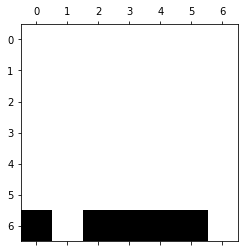

In [443]:
# backward pass:

def d_mse(yh, y):
    return y - yh

def d_sig(a):
    return 1/(1+abs(a))**2

# Create a matrix of same shape as Wij to hold gradients
dWij = np.zeros((d+M+K+1,d+M+K+1))

# compute gradient from output layer:
ii=K
for i in range(d+M+K,d+M,-1):
    ii = ii-1
    E = d_mse(yhat,ybatch)
    # distribute the MSE according to the weights of the output layer
    w_idx = np.r_[[0],d+1:d+1+M]
    w = Wij[i:i+1,w_idx]
    # there exists an error from every point
#     print("error for each point: ",E,"\n weights: ",w,"\n number of points:",E.shape[1]) 
    # gradient of error from each of the points
    dE_X = 1/E.shape[1]*w.T*E
    # gradient of the error aggregated on every dimension
#     print(np.sum(dE_X,axis=1))
    dE_d = 1/len(w_idx)*np.sum(dE_X,axis=1)
#     print("w and dE are linearly dependent; dE:",dE_d,"w:",w,"w/dE:", w/dE_d)
    dWij[i:i+1,w_idx]=dE_d
    


# compute gradients of neurons in the hidden layer in reverse order
ii=M
for i in range(d+1+M,d+1,-1):
    E=d_mse(yhat,ybatch)
    print(E)
    ii = ii - 1
    a = A[ii,:]
    z = Z[ii,:]
    
plt.spy(dWij)